#Upload the model

In [1]:
import pickle
from google.colab import files
uploaded = files.upload()

model = pickle.load(open('model2.p', 'rb')) 
print(model)

Saving model2.p to model2.p


#Import libraries and define constants

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

SIZE = 13
FILE_NAMES = ["Stop.jpg", "No-Entry.jpg", "20-kph.jpg"]

#Resizing the image resolution

In [32]:
def show_image(path):
  im = plt.imread(path)
  img = plt.imshow(im)
  return im

def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
def equalize(img):
  img =cv2.equalizeHist(img)
  return img
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img



#Classify by labels

In [33]:
def getCalssName(classNo):
  if   classNo == 0: return 'Stop'
  elif classNo == 1: return 'Speed limit (20km/h)'
  elif classNo == 2: return 'Speed Limit 30 km/h'
  elif classNo == 3: return 'Speed Limit 50 km/h'
  elif classNo == 4: return 'Speed Limit 80 km/h'
  elif classNo == 5: return 'No Passing'
  elif classNo == 6: return 'Yield'
  elif classNo == 7: return 'No Entry'
  elif classNo == 8: return 'End of all speed limits'
  elif classNo == 9: return 'Turn right'
  elif classNo == 10: return 'Turn left'
  elif classNo == 11: return 'Ahead only'
  elif classNo == 12: return 'General caution'

#Display prediction

In [34]:
def predict_image(path):
  img = show_image(path)
  img = np.asarray(img)
  img = cv2.resize(img, (32, 32))
  img = preprocessing(img)
  #cv2.imshow("Processed Image", img)
  img = img.reshape(1, 32, 32, 1)
  #cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
  #cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
  # PREDICT IMAGE
  predictions = model.predict(img)

  #Sort the predictions from least to greatest
  index_list = [i for i in range(SIZE)]

  x = predictions

  for i in range(SIZE):
    for j in range(SIZE):
      if x[0][index_list[i]] > x[0][index_list[j]]:
        #switch between values
        temp = index_list[i]
        index_list[i] = index_list[j]
        index_list[j] = temp

  #Show the sorted lables in order
  print(index_list)
  print(getCalssName(index_list[0]))

[0, 10, 7, 9, 6, 11, 4, 2, 3, 8, 5, 12, 1]
Stop


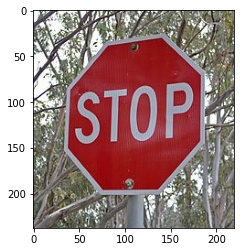

In [28]:
predict_image("Stop.jpg")

[7, 10, 6, 0, 8, 5, 9, 11, 4, 2, 3, 12, 1]
No Entry


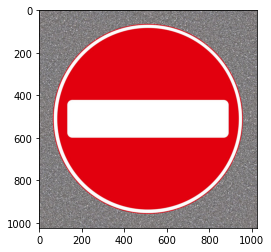

In [29]:
predict_image("No-Entry.jpg")

[1, 2, 8, 11, 4, 3, 6, 10, 9, 5, 0, 12, 7]
Speed limit (20km/h)


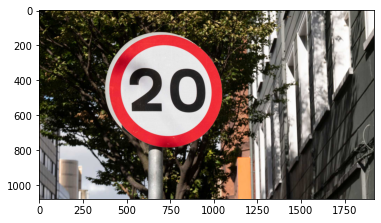

In [30]:
predict_image("20-kph.jpg")